## Initial Exploration

This notebook is just some poking around I did in the NCAA data set early on

In [8]:
import pandas as pd

seasonC = pd.read_csv('../raw data/RegularSeasonCompactResults.csv')
teams = pd.read_csv('../raw data/Teams.csv')

In [9]:
teams.head()

,Team_Id,Team_Name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M


In [10]:
seasonC = pd.merge(seasonC, teams, how='left', left_on='Wteam', right_on='Team_Id')
seasonC = pd.merge(seasonC, teams, how='left', left_on='Lteam', right_on='Team_Id')

In [11]:
seasonC.tail()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Team_Id_x,Team_Name_x,Team_Id_y,Team_Name_y
145284,2016,132,1114,70,1419,50,N,0,1114,Ark Little Rock,1419,ULM
145285,2016,132,1163,72,1272,58,N,0,1163,Connecticut,1272,Memphis
145286,2016,132,1246,82,1401,77,N,1,1246,Kentucky,1401,Texas A&M
145287,2016,132,1277,66,1345,62,N,0,1277,Michigan St,1345,Purdue
145288,2016,132,1386,87,1433,74,N,0,1386,St Joseph's PA,1433,VA Commonwealth


In [5]:
seasonC.groupby('Season').count()

,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
Season,,,,,,,
1985,3737,3737,3737,3737,3737,3737,3737
1986,3783,3783,3783,3783,3783,3783,3783
1987,3915,3915,3915,3915,3915,3915,3915
1988,3955,3955,3955,3955,3955,3955,3955
1989,4037,4037,4037,4037,4037,4037,4037
1990,4045,4045,4045,4045,4045,4045,4045
1991,4123,4123,4123,4123,4123,4123,4123
1992,4127,4127,4127,4127,4127,4127,4127
1993,3982,3982,3982,3982,3982,3982,3982


Do home teams win more?

In [6]:
seasonC.groupby('Wloc').count()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Numot
Wloc,,,,,,,
A,44229,44229,44229,44229,44229,44229,44229
H,86471,86471,86471,86471,86471,86471,86471
N,14589,14589,14589,14589,14589,14589,14589


In [7]:
seasonC.groupby('Wloc').mean()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Numot
Wloc,,,,,,,
A,2001.618395,78.951932,1286.153225,74.781343,1282.989057,65.336499,0.055507
H,2001.554035,73.416059,1287.213216,77.739092,1282.724266,64.105677,0.036544
N,2001.566043,74.636233,1285.521352,75.365207,1283.313730,64.271437,0.057166


Yup they also score more on average when at home. Is this statistically significant?

<IPython.core.display.Javascript object>


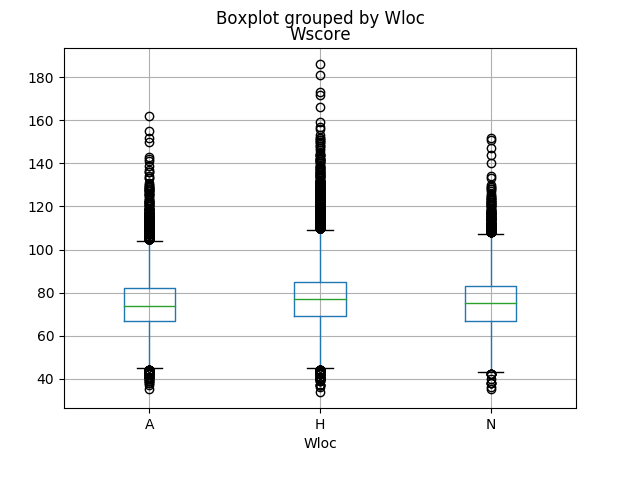

In [9]:
%matplotlib notebook
seasonC.boxplot(column='Wscore', by='Wloc')

In [11]:
import scipy.stats as stats

<IPython.core.display.Javascript object>


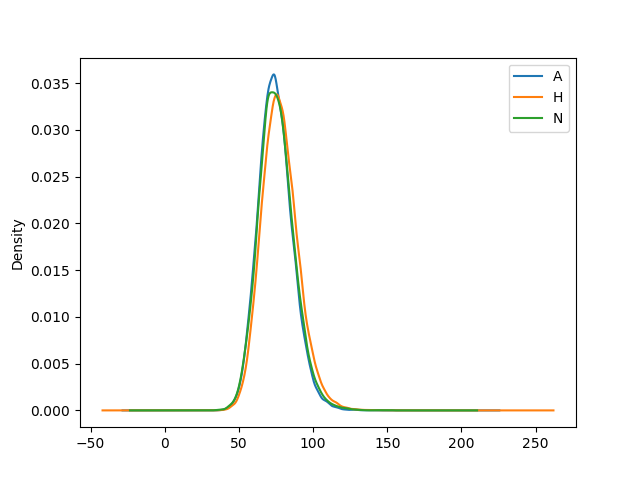

Wloc
A    Axes(0.125,0.11;0.775x0.77)
H    Axes(0.125,0.11;0.775x0.77)
N    Axes(0.125,0.11;0.775x0.77)
Name: Wscore, dtype: object

In [12]:
#is my data normal?

%matplotlib notebook

seasonC.groupby('Wloc')['Wscore'].plot(kind='density', legend=True)


In [13]:
print 'Normal Test, Wloc = Home: {}'.format(stats.normaltest(seasonC[seasonC['Wloc'] == 'H']['Wscore']).pvalue)
print 'Normal Test, Wloc = Away: {}'.format(stats.normaltest(seasonC[seasonC['Wloc'] == 'A']['Wscore']).pvalue)

Normal Test, Wloc = Home: 0.0
Normal Test, Wloc = Away: 0.0


In [19]:
stats.ttest_ind(seasonC[seasonC['Wloc'] == 'H']['Wscore'], seasonC[seasonC['Wloc'] == 'A']['Wscore'])

Ttest_indResult(statistic=41.793626638237484, pvalue=0.0)

## Regular Season Detailed

In [20]:
seasonD = pd.read_csv('../raw data/RegularSeasonDetailedResults.csv')

In [24]:
seasonD.tail()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
71236,2016,132,1114,70,1419,50,N,0,26,52,...,18,4,9,6,20,13,13,6,3,12
71237,2016,132,1163,72,1272,58,N,0,22,48,...,16,11,17,5,21,10,6,3,0,20
71238,2016,132,1246,82,1401,77,N,1,28,58,...,23,15,22,17,23,11,13,5,4,20
71239,2016,132,1277,66,1345,62,N,0,25,60,...,15,17,21,5,22,10,5,4,4,14
71240,2016,132,1386,87,1433,74,N,0,35,54,...,29,11,16,12,21,12,9,5,5,21


In [23]:
seasonD.columns.values

array(['Season', 'Daynum', 'Wteam', 'Wscore', 'Lteam', 'Lscore', 'Wloc',
       'Numot', 'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor',
       'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf', 'Lfgm', 'Lfga',
       'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto',
       'Lstl', 'Lblk', 'Lpf'], dtype=object)

In [22]:
len(seasonD)

71241

This level of data only goes back to 2003, and covers close to half of the total games in the other set

In [26]:
seasonD16 = seasonD[seasonD['Season'] == 2016]

In [27]:
len(seasonD16)

5369

In [33]:
wTeams = seasonD16.iloc[: ,[2,3,10,11]]
lTeams = seasonD16.iloc[: ,[4,5,23,24]]

In [34]:
lTeams.head()

,Lteam,Lscore,Lfgm3,Lfga3
65872,1244,64,7,19
65873,1408,67,7,27
65874,1334,61,6,19
65875,1370,56,6,16
65876,1380,68,4,12


In [37]:
wTeams.columns = ['team', 'score', 'fgm3', 'fga3']
lTeams.columns = ['team', 'score', 'fgm3', 'fga3']

In [39]:
frames = [wTeams, lTeams]

In [40]:
result = pd.concat(frames)

In [42]:
teamLevel3 = result.groupby('team').agg({'fgm3':sum, 'fga3': sum})

In [44]:
teamLevel3['fgm3p'] = teamLevel3['fgm3'] / teamLevel3['fga3']

In [46]:
teamLevel3.sort('fgm3p').tail()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,fgm3,fga3,fgm3p
team,,,
1388,271,648,0.418210
1374,194,462,0.419913
1242,268,635,0.422047
1328,334,784,0.426020
1277,310,715,0.433566


In [47]:
teams = pd.read_csv('../raw data/Teams.csv')

In [48]:
teams.head()

,Team_Id,Team_Name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M


In [50]:
teamLevel3named = pd.merge(teamLevel3, teams, how = 'left', left_index = True, right_on = "Team_Id")

In [51]:
teamLevel3named.sort_values(by = 'fgm3p').tail()

,fgm3,fga3,fgm3p,Team_Id,Team_Name
287,271,648,0.418210,1388,St Mary's CA
273,194,462,0.419913,1374,SMU
141,268,635,0.422047,1242,Kansas
227,334,784,0.426020,1328,Oklahoma
176,310,715,0.433566,1277,Michigan St


1	Michigan St	43.4%  
2	Oklahoma	42.6%  
3	Kansas	42.2%  
4	S Methodist	42.0%  
5	St Marys	41.8%  

https://www.teamrankings.com/ncaa-basketball/stat/three-point-pct?date=2016-03-14  

Close enough